Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Reading the data

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

Pulling the percentage of missing values

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
## We can see the variable "budget" has 28% of missing values while variable "gross" has 2% missing values and 
## variable "rating" has 1% missing values.

Missing value imputation for variable "rating"

In [7]:
df['rating'].isna().sum()

77

In [8]:
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
TV-14           1
Approved        1
Name: rating, dtype: int64

In [9]:
## For variable "rating" - we will be imputing the majority sub-class, i.e. "R". 

In [10]:
df['rating'] = df['rating'].fillna(value="R")

In [11]:
df['rating'].isnull().sum()

0

Missing value imputation for variable "gross"

In [12]:
df['gross'].isnull().sum()

189

In [13]:
df['gross'].describe()

count    7.479000e+03
mean     7.850054e+07
std      1.657251e+08
min      3.090000e+02
25%      4.532056e+06
50%      2.020576e+07
75%      7.601669e+07
max      2.847246e+09
Name: gross, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross'>

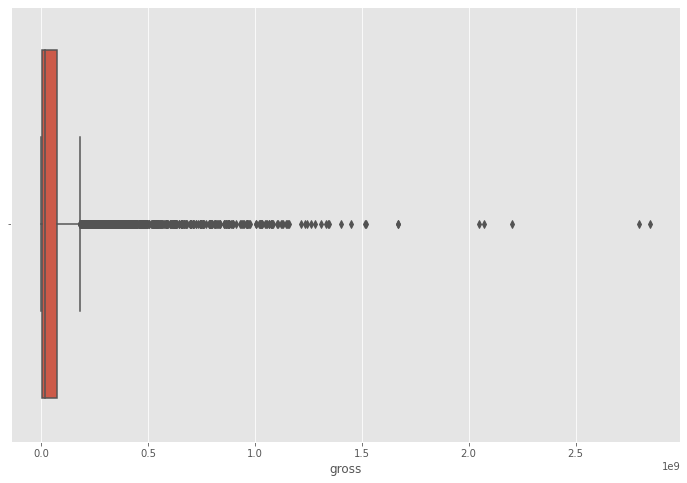

In [14]:
sns.boxplot(df['gross'])

In [15]:
## The above boxplot depcits that the attribute has outliers - hence we'll be imputing the missing values using median.

In [16]:
df['gross'].quantile([0.25,0.5,0.75])

0.25     4532055.5
0.50    20205757.0
0.75    76016691.5
Name: gross, dtype: float64

In [17]:
df['gross'] = df['gross'].fillna(value = 20205757.0)

In [18]:
df['gross'].isnull().sum()

0

Missing value imputation for the variable "budget"

In [19]:
df['budget'].isnull().sum()

2171

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget'>

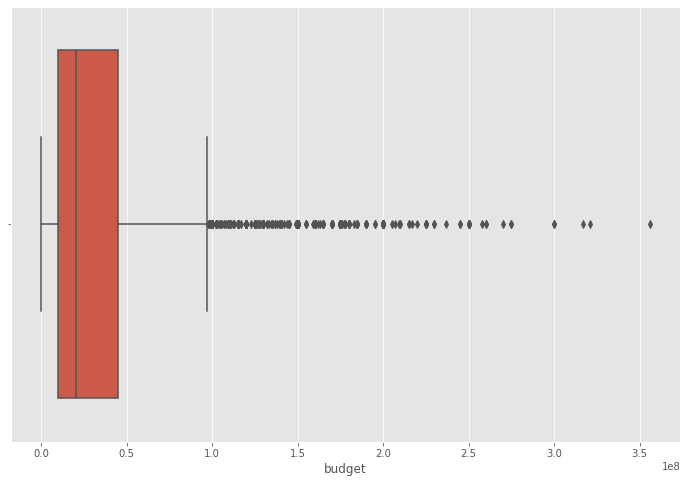

In [20]:
sns.boxplot(df['budget'])

In [21]:
## we can see above that the attribute budget has outliers and thus we will be needing to impute either median, knn or
## any other method but not using its mean.

In [22]:
## for the sake of simplicity - let's impute using median of the attribute.

In [23]:
df['budget'].quantile([0.25,0.5,0.75])

0.25    10000000.0
0.50    20500000.0
0.75    45000000.0
Name: budget, dtype: float64

In [24]:
df['budget'] = df['budget'].fillna(value = 20500000.0)

In [25]:
df['budget'].isnull().sum()

0

Pulling the datatypes of all features

In [26]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Converting datatypes - done to remove decimal part from the numbers

In [27]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


Creating a new column for year

In [29]:
## Note - The year under attribute "year" and "release" should hypothetically be same but they are not in the data ahead

In [30]:
# split column into multiple columns by delimiter 
df['released'].str.split(',', expand=True)

,0,1
0,June 13,1980 (United States)
1,July 2,1980 (United States)
2,June 20,1980 (United States)
3,July 2,1980 (United States)
4,July 25,1980 (United States)
...,...,...
7663,October 23,2020 (United States)
7664,February 7,2020 (United States)
7665,April 27,2020 (Cameroon)
7666,October 1,2020 (United States)


In [31]:
df[['split1','split2']] = df['released'].str.split(',', expand=True)

In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,split1,split2
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980 (United States)


In [34]:
df[['1','2','3','4','5','6']] = df['split2'].str.split(' ', expand=True)

In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,...,company,runtime,split1,split2,1,2,3,4,5,6
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,Warner Bros.,146.0,June 13,1980 (United States),,1980,(United,States),None,None
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,Columbia Pictures,104.0,July 2,1980 (United States),,1980,(United,States),None,None
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,Lucasfilm,124.0,June 20,1980 (United States),,1980,(United,States),None,None
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,Paramount Pictures,88.0,July 2,1980 (United States),,1980,(United,States),None,None
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,Orion Pictures,98.0,July 25,1980 (United States),,1980,(United,States),None,None


In [36]:
## dropping columns - released, year, split1, 1, 3, 4, 5, 6

In [37]:
df = df.drop(columns = ['released','year','split1','1','3','4','5','6'])

In [39]:
df = df.drop(columns = ['split2'])

In [40]:
df.rename(columns = {'2':'YEAR'}, inplace = True)

In [41]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,YEAR
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [42]:
df.shape

(7668, 14)

Sorting the data by highest value of gross revenue

In [43]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,YEAR
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [44]:
## Top 3 movies by the highest revenue earned are - avatar, avengers - endgame, titanic

Correlation analysis

Self hypothesis:

1.) Budget should be correlated with revenue - by assuming that more the money spent will fetch higher revenues

2.) Company should also be correlated with revenue - by assuming the big brands should be fetching higher revenues based on 
their brand names

In [45]:
# scatter plot - budget vs. gross

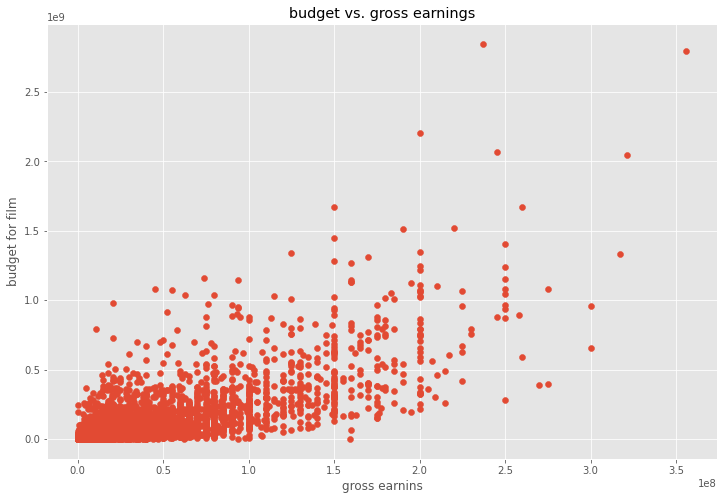

In [47]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('budget vs. gross earnings')
plt.xlabel('gross earnins')
plt.ylabel('budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

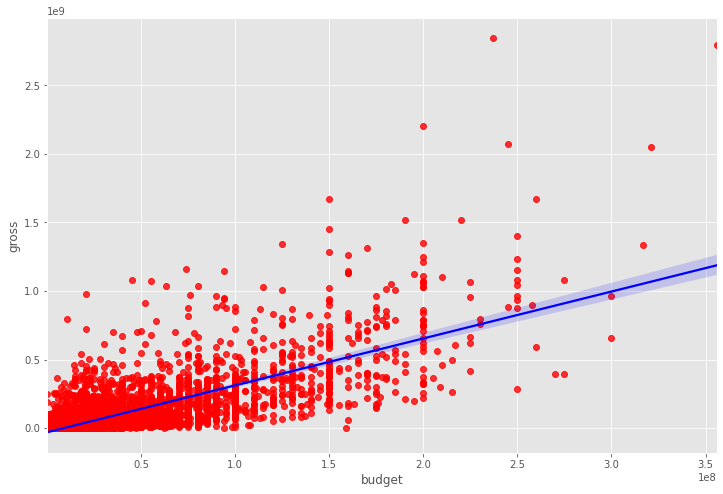

In [50]:
sns.regplot(x='budget',y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [51]:
## the above two plots show that there is a postivie correlation between budget and gross revenue. 

In [53]:
## quantification of correlation

df.corr(method = 'pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.061979,0.185583,0.399451
votes,0.409182,1.000000,0.460932,0.632103,0.309212
budget,0.061979,0.460932,1.000000,0.745881,0.273363
gross,0.185583,0.632103,0.745881,1.000000,0.244360
runtime,0.399451,0.309212,0.273363,0.244360,1.000000


In [54]:
## The above table shows that there is approx. 75% correlation between budget and gross revenue.

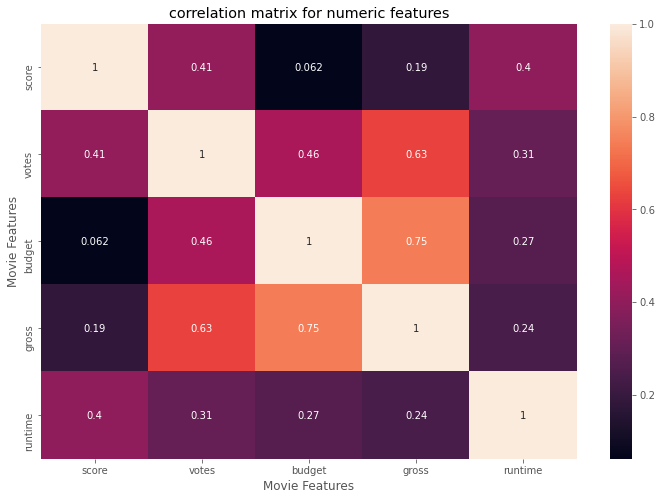

In [56]:
## plotting the correlation matrix

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [57]:
## converting non-numeric features into numeric values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        

df_numerized

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,YEAR
0,6587,6,6,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,3.1,18.0,1500,2289,2421,55,7000,20205757,-1,90.0,40
7664,1678,6,4,4.7,36.0,774,2614,1886,55,20500000,20205757,539,90.0,40
7665,4717,6,6,5.7,29.0,2061,2683,2040,55,58750,20205757,941,NaN,40
7666,2843,6,6,NaN,NaN,1184,1824,450,55,15000,20205757,-1,120.0,40


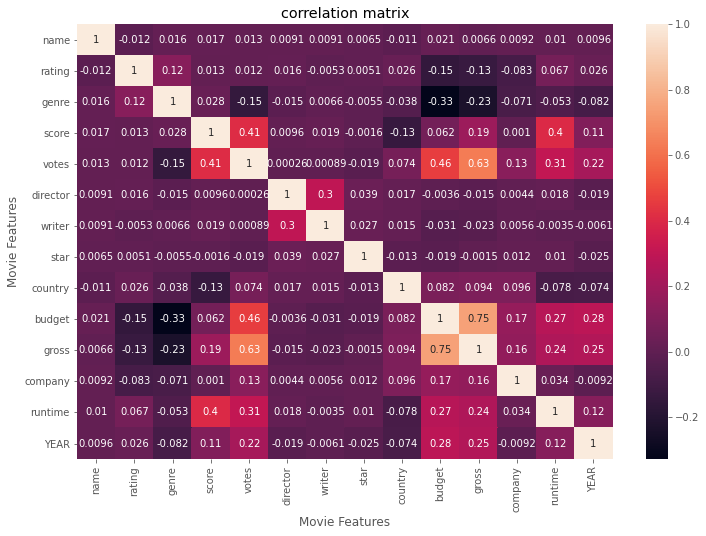

In [59]:
## plotting the correlation matrix

correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [62]:
corr_matrix = df_numerized.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

name  name       1.000000
      rating    -0.012441
      genre      0.016355
      score      0.017097
      votes      0.013088
                   ...   
YEAR  budget     0.284892
      gross      0.253848
      company   -0.009185
      runtime    0.121534
      YEAR       1.000000
Length: 196, dtype: float64

In [63]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.328484
budget   genre     -0.328484
genre    gross     -0.233385
gross    genre     -0.233385
rating   budget    -0.148543
                      ...   
score    score      1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
YEAR     YEAR       1.000000
Length: 196, dtype: float64

In [65]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.632103
gross     votes       0.632103
budget    gross       0.745881
gross     budget      0.745881
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
YEAR      YEAR        1.000000
dtype: float64

In [66]:
## The second hypothesis made, i.e. company has to be correlated with gross revenue earned stands negated

## However, votes and budget are the two attributes showing highest correlation w.r.t gross revenue.